In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
columnas_events= ["date","event_id","event_uuid","ref_type","ref_hash","application_id","attributed"
                  ,"device_brand","device_model","carrier","device_os","wifi","connection_type"]

events = pd.read_csv("events.csv", usecols=columnas_events, parse_dates=["date"])



/home/pelozo/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3044: DtypeWarning: Columns (18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
clicks = pd.read_csv("clicks.csv", parse_dates = ["created"])

In [14]:
clicks["created"] = clicks["created"].astype("datetime64[ns]")

In [4]:
events.dtypes

date               datetime64[ns]
event_id                    int64
ref_type                    int64
ref_hash                    int64
application_id              int64
attributed                   bool
device_brand              float64
device_model              float64
event_uuid                 object
carrier                   float64
device_os                 float64
wifi                       object
connection_type            object
dtype: object

In [5]:
clicks.dtypes

advertiser_id                    int64
action_id                      float64
source_id                        int64
created            datetime64[ns, UTC]
country_code                     int64
latitude                       float64
longitude                      float64
wifi_connection                   bool
carrier_id                     float64
trans_id                        object
os_minor                       float64
agent_device                   float64
os_major                       float64
specs_brand                      int64
brand                          float64
timeToClick                    float64
touchX                         float64
touchY                         float64
ref_type                         int64
ref_hash                         int64
dtype: object

# Vamos a unir los eventos atribuidos a su click más cercano en el tiempo

### Ordeno los datos por fechas

In [23]:
events_att = events[events["attributed"] == True].copy()

In [24]:
clicks.sort_values(by = "created", inplace =  True)

In [25]:
events_att.sort_values(by = "date",inplace = True)

#### Serializo el dataset:

In [26]:
events_att.to_pickle("events att pickle")

#### Obtengo el dataset serializado

In [6]:
events_att = pd.read_pickle("events att pickle")


In [7]:
events_att.head(3)

,date,event_id,ref_type,ref_hash,application_id,attributed,device_brand,device_model,event_uuid,carrier,device_os,wifi,connection_type
1904725,2019-03-05 00:00:11.451,31,1891515180541284343,7305275656281795978,63,True,3.083059e+17,7.628197e+18,NaN,NaN,NaN,True,NaN
1904727,2019-03-05 00:00:47.861,31,1891515180541284343,5857404737834848954,63,True,2.523246e+18,5.668689e+18,NaN,NaN,NaN,True,NaN
1904724,2019-03-05 00:02:09.503,31,1891515180541284343,9187632704477893816,63,True,3.083059e+17,7.787531e+18,NaN,NaN,NaN,False,NaN


In [31]:
clicks.head(3)

,advertiser_id,action_id,source_id,created,country_code,latitude,longitude,wifi_connection,carrier_id,trans_id,os_minor,agent_device,os_major,specs_brand,brand,timeToClick,touchX,touchY,ref_type,ref_hash
3451,0,NaN,0,2019-03-05 01:17:30.663,6333597102633388268,1.205689,1.070234,False,4.0,dwOR6mUnkJLVaXbnhDpQGxZLFdANK3o,3.399962e+18,3.516812e+18,6.693579e+18,2733035977666442898,NaN,NaN,0.158,0.097,1494519392962156891,4211224578747712831
3452,0,NaN,1,2019-03-05 01:44:16.824,6333597102633388268,1.205393,1.077238,False,10.0,UrAaN9jolZTycEdgGieNzVVTnHGcBJg,3.399962e+18,3.516812e+18,6.693579e+18,2733035977666442898,NaN,NaN,0.091,0.360,1494519392962156891,6447802891648830796
21124,0,NaN,6,2019-03-05 02:07:49.451,6333597102633388268,1.205689,1.070234,False,13.0,cuSDPTJszQQSMBYLr7-E1-JRxlZOb7c,3.025219e+18,NaN,1.774085e+18,2733035977666442898,NaN,NaN,0.934,0.064,1891515180541284343,3045447270889734275


### A primera vista se ve en los primeros valores de cada dataframe que el evento mas antiguo es menor que el click más antiguo:

In [33]:
clicks["created"].min()

Timestamp('2019-03-05 01:17:30.663000')

In [35]:
events_att["date"].min()

Timestamp('2019-03-05 00:00:11.451000')

#### Comentario : No se que tan valido es decir esto ya que tecnicamente las fechas esas corresponden a distintos dispositivos

### Debido a esto vamos a unir los dataframes usando como premisa que para obtener el click que desencadena en un evento atribuido, se debe unir este ultimo al click anterior en el tiempo más cercano. (O sea al maximo de los menores)

#### Dejo en el dataframes de clicks solo los clicks y eventos de dispositivos que se encuentren en los dos dataframes

In [16]:
clicks_att = clicks[ clicks["ref_hash"].isin(events_att["ref_hash"])].copy()

In [9]:
events_att = events_att[ events_att["ref_hash"].isin(clicks_att["ref_hash"])]

In [17]:
clicks_att.sort_values(by="created",inplace = True)

In [11]:
events_att.sort_values(by = "date",inplace = True)

#### Corroboro que todo quedo bien:

In [63]:
clicks_att.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 3452 to 18378
Data columns (total 20 columns):
advertiser_id      52 non-null int64
action_id          0 non-null float64
source_id          52 non-null int64
created            52 non-null datetime64[ns]
country_code       52 non-null int64
latitude           52 non-null float64
longitude          52 non-null float64
wifi_connection    52 non-null bool
carrier_id         51 non-null float64
trans_id           52 non-null object
os_minor           51 non-null float64
agent_device       18 non-null float64
os_major           51 non-null float64
specs_brand        52 non-null int64
brand              10 non-null float64
timeToClick        29 non-null float64
touchX             44 non-null float64
touchY             44 non-null float64
ref_type           52 non-null int64
ref_hash           52 non-null int64
dtypes: bool(1), datetime64[ns](1), float64(11), int64(6), object(1)
memory usage: 8.2+ KB


In [86]:
clicks_att.nunique()

advertiser_id       3
action_id           0
source_id           4
date               52
country_code        1
latitude            7
longitude           7
wifi_connection     1
carrier_id         16
trans_id           52
os_minor            9
agent_device        2
os_major            6
specs_brand         2
brand               3
timeToClick        29
touchX             42
touchY             40
ref_type            2
ref_hash           26
dtype: int64

### Valores unicos para identificación "date" y "trans_id"

In [64]:
events_att.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173 entries, 929301 to 1008571
Data columns (total 13 columns):
date               173 non-null datetime64[ns]
event_id           173 non-null int64
ref_type           173 non-null int64
ref_hash           173 non-null int64
application_id     173 non-null int64
attributed         173 non-null bool
device_brand       155 non-null float64
device_model       172 non-null float64
event_uuid         0 non-null object
carrier            0 non-null float64
device_os          0 non-null float64
wifi               172 non-null object
connection_type    0 non-null object
dtypes: bool(1), datetime64[ns](1), float64(4), int64(4), object(3)
memory usage: 17.7+ KB


In [24]:
events_att.nunique()

date_event         173
event_id            12
ref_type             2
ref_hash            26
application_id       5
attributed           1
device_brand         8
device_model        18
event_uuid           0
carrier              0
device_os            0
wifi                 2
connection_type      0
dtype: int64

### El unico valor que sirve para la identificación es "date"

#### Son 52 clicks para 173 eventos

In [65]:
events_att["ref_hash"].nunique()

26

In [67]:
clicks_att["ref_hash"].nunique()

26

### 26 Dispositivos para 52 clicks y 173 eventos

In [89]:
events_att["date"].min()

Timestamp('2019-03-05 02:44:49.519000')

In [90]:
clicks_att["date"].min()

Timestamp('2019-03-05 01:44:16.824000')

### Vamos a utilizar merge_asof para buscar la fecha anterior de un click más cercana a la fecha del evento usando como clave el ref_hash

In [18]:
clicks_att.rename(columns = {"created":"date_click"},inplace = True)
events_att.rename(columns = {"date":"date_event"},inplace = True)


In [19]:
join = pd.merge_asof(events_att, clicks_att,left_on="date_event",right_on="date_click", by="ref_hash",suffixes=("_event","_click"))


In [20]:
join.columns

Index(['date_event', 'event_id', 'ref_type_event', 'ref_hash',
       'application_id', 'attributed', 'device_brand', 'device_model',
       'event_uuid', 'carrier', 'device_os', 'wifi', 'connection_type',
       'advertiser_id', 'action_id', 'source_id', 'date_click', 'country_code',
       'latitude', 'longitude', 'wifi_connection', 'carrier_id', 'trans_id',
       'os_minor', 'agent_device', 'os_major', 'specs_brand', 'brand',
       'timeToClick', 'touchX', 'touchY', 'ref_type_click'],
      dtype='object')

In [21]:
join.head(3)

,date_event,event_id,ref_type_event,ref_hash,application_id,attributed,device_brand,device_model,event_uuid,carrier,...,trans_id,os_minor,agent_device,os_major,specs_brand,brand,timeToClick,touchX,touchY,ref_type_click
0,2019-03-05 02:44:49.519,31,1494519392962156891,794348227989563384,170,True,NaN,2.331947e+18,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-03-05 04:23:21.198,31,1494519392962156891,5205327879804908010,170,True,NaN,2.331947e+18,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-03-05 16:13:09.348,31,1891515180541284343,7713803070332508145,63,True,2.987569e+18,4.545490e+18,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Se puede observar que hay eventos para los que no pudo encontrar un click anterior

In [22]:
len(join)

173

### Como habiamos visto anteriormente hay 173 eventos atribuidos. ¿Cuantos tienen un click previo?

In [28]:
join["trans_id"].notna().sum()

90

In [30]:
join["has_click"] =  join["trans_id"].notna()

In [38]:
def autolabel_pct(pct):
    return "{:.1f}%".format(pct)

def autolabel_height(grafico, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    xpos = xpos.lower()  # normalize the case of the parameter
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0.5, 'right': 0.57, 'left': 0.43}  # x_txt = x + w*off

    for bar in grafico.patches:
        height = bar.get_height()
        grafico.text(bar.get_x() + bar.get_width()*offset[xpos], 1.01*height,
                '{}'.format(height), ha=ha[xpos], va='bottom')


Text(0.5, 0.98, 'Porcentaje de eventos filtrados que contienen un click previo')

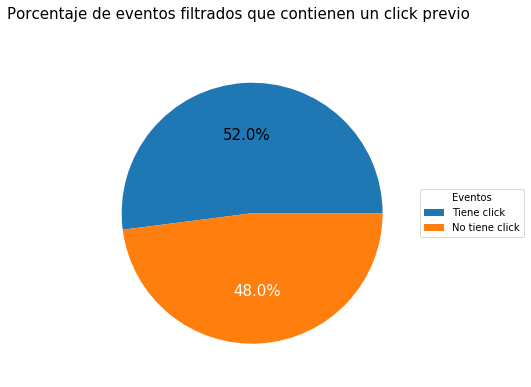

In [41]:
fig, ax = plt.subplots( figsize = (15,6), )

datos = join["has_click"].value_counts()
labels = ["Tiene click", "No tiene click"]

graf_torta = ax.pie(datos, autopct = autolabel_pct)

graf_torta[2][0].set_fontsize(15)
graf_torta[2][1].set_color("w")
graf_torta[2][1].set_fontsize(15)

ax.legend(graf_torta[0], labels,
          title="Eventos",
          loc="center left",
          bbox_to_anchor=(1, 0, 0, 1))

fig.suptitle("Porcentaje de eventos filtrados que contienen un click previo",fontsize = 15)


## Dataframe para sacar estadisticas de clicks que llevan a eventos atribuidos

In [52]:
#Columnas de ejemplo
join_short = join[["event_id","ref_hash","application_id","advertiser_id","timeToClick","touchX","touchY","has_click"]]

In [53]:
join_short[ join_short["has_click"] == True].head(10)

,event_id,ref_hash,application_id,advertiser_id,timeToClick,touchX,touchY,has_click
24,31,8983455136472355809,16,8.0,0.695,0.257,0.988,True
25,513,8983455136472355809,16,8.0,0.695,0.257,0.988,True
56,31,6447802891648830796,56,0.0,NaN,0.262,0.003,True
76,31,4423154736192166693,102,0.0,NaN,0.633,0.107,True
78,133,4423154736192166693,102,0.0,NaN,0.633,0.107,True
79,31,1197020933501942270,102,0.0,NaN,NaN,NaN,True
80,31,8569678576097759996,102,0.0,NaN,0.551,0.081,True
89,134,1197020933501942270,102,0.0,NaN,NaN,NaN,True
90,133,8569678576097759996,102,0.0,NaN,0.551,0.081,True
91,133,8569678576097759996,102,0.0,NaN,0.551,0.081,True
